# Entrenamiento de Redes Neuronales con Scikit Learn

## Multi-layer perceptron: Ejemplo 1

En éste primer ejemplo se ilustra el entrenamiento de una Red Neuronal Artificial tipo perceptron multicapa (MLP) usando Scikit Learn. Para el ejemplo sólo se considera: como se importa el modelo MLP, como se dividien los datos en un conjunto training y un conjunto test, así como la sintaxis usada para el llamado del modelo especificando algunos hiper - parámetros de forma básica.

Primero se importan librerias para el proyecto, así como "make blobs" para generar un conjunto de datos sintéticos con una distribución Gausiana

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

Se genera un conjunto de 200 instancias divididas en 4 grupos, ubicadas cada una de ellas alrededor de los centroides definidos en blob_centers. La función make_blobs regresa el conjunto de datos generados así como sus respectivas etiquetas ([Referencia](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)).
Posteriormente se genera una gráfica con plt.subplots() ([Referencia](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)). Para ello, se recorre cada clase y se van filtrando las instancias pertenecientes a cada clase, se obtiene la coordenada (x, y) de cada instancia, se le asigna un color (c), el tamaño (s), y la etiqueta de clase de cada punto.

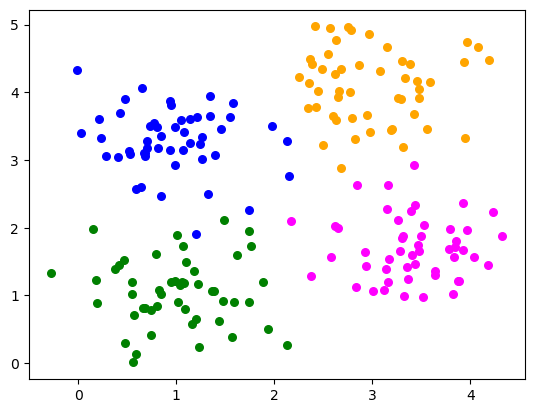

In [2]:
n_samples = 200
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
data, labels = make_blobs(n_samples=n_samples, 
                          centers=blob_centers, 
                          cluster_std=0.5,
                          random_state=0)


colours = ('green', 'orange', "blue", "magenta")
fig, ax = plt.subplots()

for n_class in range(len(blob_centers)):
    ax.scatter(data[labels==n_class][:, 0], 
               data[labels==n_class][:, 1], 
               c=colours[n_class], 
               s=30, 
               label=str(n_class))

Se importa la función para generar el conjunto de entrenamiento y prueba: 80% training, 20% test

In [13]:
from sklearn.model_selection import train_test_split
datasets = train_test_split(data, 
                            labels,
                            test_size=0.2)

train_data, test_data, train_labels, test_labels = datasets

Se importa una red neuronal tipo percetrón multicapa de propagación hacia adelante (Multi-Layer Percetron) y se configuran sus parámetros ([Referencia](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)). 

In [14]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', 
                    alpha=1e-5,
                    hidden_layer_sizes=(6,), 
                    random_state=1)

clf.fit(train_data, train_labels)     

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(6,), random_state=1,
              solver='lbfgs')

In [15]:
clf.score(train_data, train_labels)

0.9875

In [18]:
from sklearn.metrics import accuracy_score

predictions_train = clf.predict(train_data)
predictions_test = clf.predict(test_data)
acc_train_score = accuracy_score(predictions_train, train_labels)
print("Accuracy score on train data: ", acc_train_score)
acc_test_score = accuracy_score(predictions_test, test_labels)
print("Accuracy score on test data: ", acc_test_score)

Accuracy score on train data:  0.9875
Accuracy score on test data:  0.975
